In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv")
dataframe = pd.DataFrame(data)

In [4]:
X = data.iloc[:,0:8]
Y = data.iloc[:,8]

<Axes: >

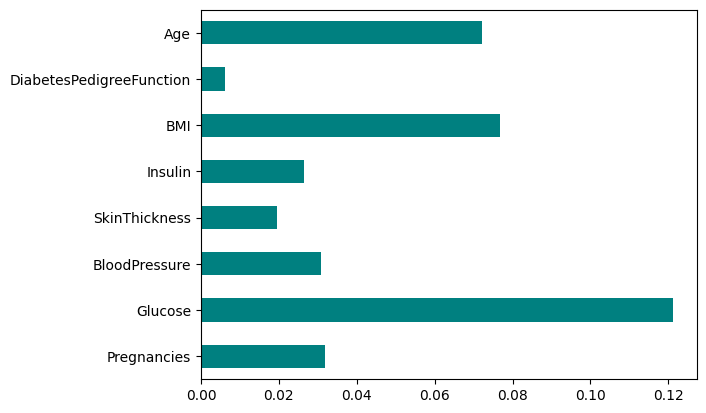

In [5]:
importance = mutual_info_classif(X,Y)
feat_importance = pd.Series(importance,dataframe.columns[0:8])
feat_importance.plot(kind='barh',color='teal')

### Task 1 | Apply Information Gain (IG) methods for feature selection on Motor Insurance Fraud data set and discover the selected features.

In [6]:
data_insurance_claims = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/Datasets/insurance_claims.csv")
data_frame_ic = pd.DataFrame(data_insurance_claims)

data_frame_ic.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12/10/2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04/06/2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03/02/1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05/02/1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25/07/2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [44]:
le = LabelEncoder()
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.iloc[:,0:39].values
Y = data.iloc[:,39].values
print(X)
# for X
# X = X.apply(le.fit_transform)
X = imputer.fit_transform(X)
# for Y
Y = Y.reshape(-1,1)
Y = imputer.fit_transform(Y)
Y = Y.reshape(-1,)

data.head()

[[3.28000e+02 4.80000e+01 5.21585e+05 ... 1.00000e+00 2.00400e+03
          nan]
 [2.28000e+02 4.20000e+01 3.42868e+05 ... 1.20000e+01 2.00700e+03
          nan]
 [1.34000e+02 2.90000e+01 6.87698e+05 ... 3.00000e+01 2.00700e+03
          nan]
 ...
 [1.30000e+02 3.40000e+01 9.18516e+05 ... 1.90000e+01 1.99600e+03
          nan]
 [4.58000e+02 6.20000e+01 5.33940e+05 ... 5.00000e+00 1.99800e+03
          nan]
 [4.56000e+02 6.00000e+01 5.56080e+05 ... 1.20000e+01 2.00700e+03
          nan]]


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,_c39,new_fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,2004,NaN,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,NaN,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,2007,NaN,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,2014,NaN,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,2009,NaN,0


In [54]:
print(X.shape)

(1000, 38)


In [61]:
importance = mutual_info_classif(X,Y,discrete_features='auto')
feat_importance = pd.Series(importance,index=X.columns if isinstance(X, pd.DataFrame) else X.drop(columns=["new_fraud_reported"]).columns)
feat_importance.plot(kind='barh',color='teal')

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [71]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

data = pd.read_csv('MotorInsuranceFraudClaimABTFull.csv')
le = LabelEncoder()
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


X = data.drop(columns=['Insurance Type ','Marital Status','Injury Type',
                            'Overnight Hospital Stay'])
y = data['Fraud Flag']

importance = mutual_info_classif(X, y)

feat_importance = pd.Series(importance, index=X.columns)
feat_importance.plot(kind='barh', color='teal')


ValueError: Input X contains NaN.